In [171]:
import os
import math
import glob
import shutil
import numpy as np
import matlab.engine
import matplotlib.pyplot as plt
from scipy.io import savemat
import random
import nibabel as nib

In [ ]:
eng = matlab.engine.start_matlab()

In [14]:
# Load avg rotations 
p = []
for path in glob.glob('/nfs/masi/MASIver/data/metrics/sub-PC*/*/dwi/OUTPUTS*/STATS/eddy_avg_rotations.txt'):
    p.append(path)
p.sort()

avg_rotations_x = []
avg_rotations_y = []
avg_rotations_z = []
for i in range(len(p)-1):
    txt_data = np.loadtxt(p[i+1])
    # x 
    avg_rotations_x.append(txt_data[0])
    # y 
    avg_rotations_y.append(txt_data[1])
    # z 
    avg_rotations_z.append(txt_data[2])

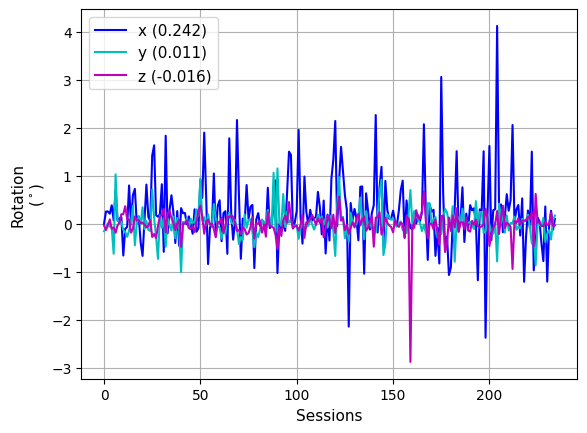

In [46]:
# Plot rotations in for one scan in within sessions groups 
plt.plot(range(0, len(avg_rotations_x)), avg_rotations_x, color='b', label='x ({:.3f})'.format(np.nanmean(avg_rotations_x)))
plt.plot(range(0, len(avg_rotations_y)), avg_rotations_y, color='c', label='y ({:.3f})'.format(np.nanmean(avg_rotations_y)))
plt.plot(range(0, len(avg_rotations_z)), avg_rotations_z, color='m', label='z ({:.3f})'.format(np.nanmean(avg_rotations_z)))
plt.ylabel('Rotation' '\n' r'($^\circ$)', fontsize=11)
plt.xlabel('Sessions', fontsize=11)
plt.grid()
plt.legend(fontsize=11, loc='upper left')

In [33]:
# Load avg translations  
p = []
for path in glob.glob('/nfs/masi/MASIver/data/metrics/sub-PC*/*/dwi/OUTPUTS*/STATS/eddy_avg_translations.txt'):
    p.append(path)
p.sort()

avg_translations_x = []
avg_translations_y = []
avg_translations_z = []
for i in range(len(p)-1):
    txt_data = np.loadtxt(p[i+1])
    # x 
    avg_translations_x.append(txt_data[0])
    # y 
    avg_translations_y.append(txt_data[1])
    # z 
    avg_translations_z.append(txt_data[2])

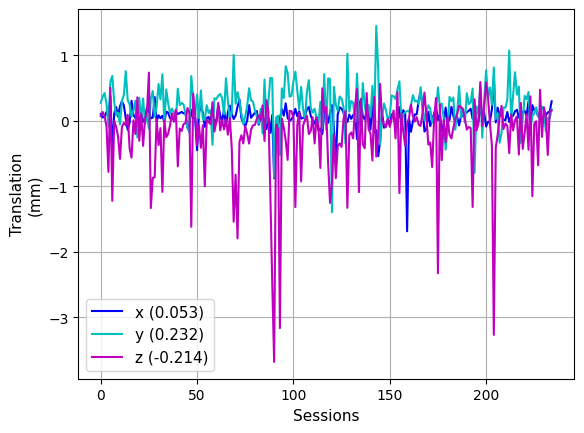

In [47]:
# Plot translations in for one scan in within sessions groups 
plt.plot(range(0, len(avg_translations_x)), avg_translations_x, color='b', label='x ({:.3f})'.format(np.nanmean(avg_translations_x)))
plt.plot(range(0, len(avg_translations_y)), avg_translations_y, color='c', label='y ({:.3f})'.format(np.nanmean(avg_translations_y)))
plt.plot(range(0, len(avg_translations_z)), avg_translations_z, color='m', label='z ({:.3f})'.format(np.nanmean(avg_translations_z)))
plt.ylabel('Translation\n(mm)', fontsize=11)
plt.xlabel('Sessions', fontsize=11)
plt.grid()
plt.legend(fontsize=11, loc='lower left')

In [39]:
# Load abs_displacement
p = []
for path in glob.glob('/nfs/masi/MASIver/data/metrics/sub-PC*/*/dwi/OUTPUTS*/STATS/eddy_avg_abs_displacement.txt'):
    p.append(path)
p.sort()


avg_abs_displacement = []
for i in range(len(p)-1):
    txt_data = np.loadtxt(p[i+1])
    # x 
    avg_abs_displacement.append(txt_data)

# Load rel_displacement
p = []
for path in glob.glob('/nfs/masi/MASIver/data/metrics/sub-PC*/*/dwi/OUTPUTS*/STATS/eddy_avg_rel_displacement.txt'):
    p.append(path)
p.sort()

avg_rel_displacement = []
for i in range(len(p)-1):
    txt_data = np.loadtxt(p[i+1])
    # x 
    avg_rel_displacement.append(txt_data)

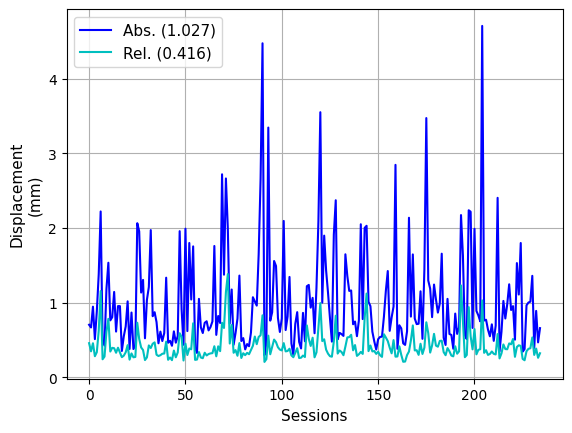

In [48]:
# Plot translations in for one scan in within sessions groups 
plt.plot(range(0, len(avg_abs_displacement)), avg_abs_displacement, color='b', label='Abs. ({:.3f})'.format(np.nanmean(avg_abs_displacement)))
plt.plot(range(0, len(avg_rel_displacement)), avg_rel_displacement, color='c', label='Rel. ({:.3f})'.format(np.nanmean(avg_rel_displacement)))
plt.ylabel('Displacement\n(mm)', fontsize=11)
plt.xlabel('Sessions', fontsize=11)
plt.grid()
plt.legend(fontsize=11, loc='upper left')

In [49]:
# Move PDF and rename
p = []
for path in glob.glob('/nfs/masi/MASIver/data/metrics/sub-PC*/*/dwi/OUTPUTS*/PDF/dtiQA.pdf'):
    p.append(path)
p.sort()

In [ ]:
for i in range(len(p)):
    src_dir = p[i]
    root = '/nfs/masi/kanakap/projects/LR/kids_pdf/'
    subj = p[i].split('/')[6]
    sess = p[i].split('/')[7]
    scan = p[i].split('/')[9]
    filename = subj + '_' + sess + '_' + scan + '_' + 'dtiQA.pdf'
    # move p[i] to root/ filename
    des_dir = os.path.join(root,filename)
    print(src_dir)
    print(des_dir)
    shutil.copy(src_dir,des_dir)
    
    

In [64]:
print(np.min(avg_translations_x))
print(np.max(avg_translations_x))

-1.6870541
0.6532771


In [65]:
print(np.min(avg_translations_y))
print(np.max(avg_translations_y))

-1.3963556
1.4520127


In [68]:
print(np.min(avg_rel_displacement))
print(np.max(avg_rel_displacement))

0.2063168
1.3828516


(array([-6., -4., -2.,  0.,  2.,  4.,  6.]),
 [Text(0, -6.0, '−6'),
  Text(0, -4.0, '−4'),
  Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6')])

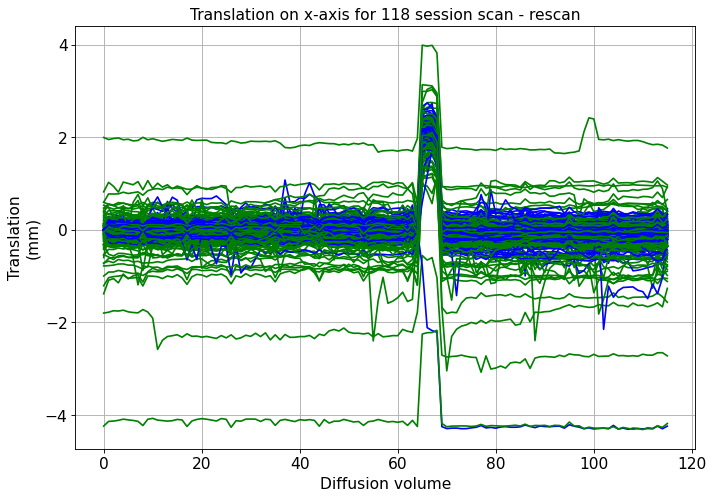

In [40]:
# Load rotations 
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/*/*/dwi/prequal_out/EDDY/eddy_results.eddy_parameters'):
    p.append(path)
p.sort()

rotations_x = []
rotations_y = []
rotations_z = []
rotations_x2 = []
rotations_y2 = []
rotations_z2 = []

plt.figure(figsize=(10, 7), dpi=80)

for i in range(len(p)-1):
    eddy_params = np.loadtxt(p[i])

    # rotations = eddy_params[:, 3:6] / np.pi * 180
    rotations = eddy_params[:, 0:3]
    scan1 = int(len(rotations) / 2)
    #x 
    rotations_x.append(rotations[:scan1,0])
    plt.plot(range(0, len(rotations[:scan1,0])), rotations[:scan1,0], color='b')#, label='x ({:.3f})'.format(np.nanmean(rotations_x)))

    # y 
    # rotations_y.append(rotations[:scan1,1])
    # plt.plot(range(0, len(rotations[:scan1,1])), rotations[:scan1,1])#, color='b', label='x ({:.3f})'.format(np.nanmean(rotations_x)))
    # z 
    # rotations_z.append(rotations[:scan1,2])
    # plt.plot(range(0, len(rotations[:scan1,2])), rotations[:scan1,2])#, color='b', label='x ({:.3f})'.format(np.nanmean(rotations_x)))

    # #x 
    rotations_x2.append(rotations[scan1:,0])
    plt.plot(range(0, len(rotations[scan1:,0])), rotations[scan1:,0], color='g')#, label='x ({:.3f})'.format(np.nanmean(rotations_x)))
    # # y 
    # rotations_y2.append(rotations[scan1:,1])
    # # z 
    # rotations_z2.append(rotations[scan1:,2])

plt.title('Translation on x-axis for 118 session scan - rescan', fontsize=14)
plt.grid()
plt.ylabel('Translation\n(mm)', fontsize=14)
plt.xlabel('Diffusion volume', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [30]:
len(rotations[:scan1,0])

116

In [ ]:
import re
import os
import glob
import subprocess
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/*/*/dwi'):
    p.append(path)
p.sort()

count = 0
for i in p:
    print(i)
    run1 = {'dwi':[] ,'bvec': [], 'bval': []}
    run2 = {'dwi':[] ,'bvec': [], 'bval': []}
    for f in os.listdir(i):
        pattern = 'APP'
        if re.search(pattern,f):
            prun1 = 'run-1'
            if re.search(prun1,f):
                if f.endswith('.gz'):
                    l = i + "/" + f
                    run1['dwi'].append(l)
                if f.endswith('.bvec'):
                    l = i + "/" + f
                    run1['bvec'].append(l)
                if f.endswith('.bval'):
                    l = i + "/" + f
                    run1['bval'].append(l)
            prun2 = 'run-2'
            if re.search(prun2,f):
                if f.endswith('.gz'):
                    l = i + "/" + f
                    run2['dwi'].append(l)
                if f.endswith('.bvec'):
                    l = i + "/" + f
                    run2['bvec'].append(l)
                if f.endswith('.bval'):
                    l = i + "/" + f
                    run2['bval'].append(l)
    run1['dwi'].sort()
    run1['bvec'].sort()
    run1['bval'].sort()
    a = run1['dwi'][0]
    print(a)
    subj = a.split('/')[7]
    sess = a.split('/')[8]
    outdir = '/nfs/masi/kanakap/projects/estimate/MASiVar_kids/' + subj + "/"+ sess +'/dwi_cat/'
    out_dwi1 = outdir + subj + "_" + sess  + '_acq-b1000b2000n96r21x21x22peAPP_run-1_dwi.nii.gz'
    out_bval1 = outdir + subj + "_" + sess + '_acq-b1000b2000n96r21x21x22peAPP_run-1_dwi.bval'
    out_bvec1 = outdir + subj + "_" + sess + '_acq-b1000b2000n96r21x21x22peAPP_run-1_dwi.bvec'
    mean_bzero_run1 = outdir + "mean_bzero_run-1.mif"

    command1 = "dwiextract "+ out_dwi1 + " -fslgrad "+ out_bvec1 +" "+ out_bval1 + " - -bzero | mrmath - mean "+ mean_bzero_run1 +" -axis 3"
    print(command1)
    # proc = subprocess.Popen(command1)
    # proc.wait()

    run2['dwi'].sort()
    run2['bvec'].sort()
    run2['bval'].sort()
    out_dwi2 = outdir + subj + "_" + sess + '_acq-b1000b2000n96r21x21x22peAPP_run-2_dwi.nii.gz'
    out_bval2 = outdir + subj + "_" + sess + '_acq-b1000b2000n96r21x21x22peAPP_run-2_dwi.bval'
    out_bvec2 = outdir + subj + "_" + sess + '_acq-b1000b2000n96r21x21x22peAPP_run-2_dwi.bvec'
    mean_bzero_run2 = outdir + "mean_bzero_run-2.mif"

    command2 = "dwiextract "+ out_dwi2 + " -fslgrad "+ out_bvec2 +" "+ out_bval2 + " - -bzero | mrmath - mean "+ mean_bzero_run2 +" -axis 3"
    print(command2)
    # proc2 = subprocess.Popen(command2)
    # proc2.wait()
    with open('/nfs/masi/kanakap/projects/estimate/run_meanb0.sh','a') as f:
        f.write(command1)
        f.write('\n')
        f.write(command2)
        f.write('\n')

    count+=1

print(count)

In [ ]:
import re
import os
import glob
import subprocess
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/*/*/dwi'):
    p.append(path)
p.sort()

count = 0
for i in p:
    print(i)
    run1 = {'dwi':[] ,'bvec': [], 'bval': []}
    run2 = {'dwi':[] ,'bvec': [], 'bval': []}
    for f in os.listdir(i):
        pattern = 'APP'
        if re.search(pattern,f):
            prun1 = 'run-1'
            if re.search(prun1,f):
                if f.endswith('.gz'):
                    l = i + "/" + f
                    run1['dwi'].append(l)
                if f.endswith('.bvec'):
                    l = i + "/" + f
                    run1['bvec'].append(l)
                if f.endswith('.bval'):
                    l = i + "/" + f
                    run1['bval'].append(l)
            prun2 = 'run-2'
            if re.search(prun2,f):
                if f.endswith('.gz'):
                    l = i + "/" + f
                    run2['dwi'].append(l)
                if f.endswith('.bvec'):
                    l = i + "/" + f
                    run2['bvec'].append(l)
                if f.endswith('.bval'):
                    l = i + "/" + f
                    run2['bval'].append(l)
    run1['dwi'].sort()
    run1['bvec'].sort()
    run1['bval'].sort()
    a = run1['dwi'][0]
    print(a)
    subj = a.split('/')[7]
    sess = a.split('/')[8]
    outdir = '/nfs/masi/kanakap/projects/estimate/MASiVar_kids/' + subj + "/"+ sess +'/dwi_cat/'
    out_dwi1 = outdir + subj + "_" + sess  + '_acq-b1000b2000n96r21x21x22peAPP_run-1_dwi.nii.gz'
    out_bval1 = outdir + subj + "_" + sess + '_acq-b1000b2000n96r21x21x22peAPP_run-1_dwi.bval'
    out_bvec1 = outdir + subj + "_" + sess + '_acq-b1000b2000n96r21x21x22peAPP_run-1_dwi.bvec'
    dt_run1 = outdir + "dt_run-1.nii.gz"

    command1 = "dwi2tensor "+ out_dwi1 + " -fslgrad "+ out_bvec1 +" "+ out_bval1 +" "+ dt_run1
    print(command1)
    # proc = subprocess.Popen(command1)
    # proc.wait()

    with open('/nfs/masi/kanakap/projects/estimate/run_dt_run1.sh','a') as f:
        f.write(command1)
        f.write('\n')


    count+=1

print(count)

In [189]:
subjs = ['sub-cIVs001', 'sub-cIVs005', 'sub-cIVs006', 'sub-cIVs007', 'sub-cIVs012', 'sub-cIVs013']#, 'sub-cIVs017', 'sub-cIVs018', 'sub-cIVs024', 'sub-cIVs025', 'sub-cIVs026', 'sub-cIVs029', 'sub-cIVs030', 'sub-cIVs032', 'sub-cIVs036', 'sub-cIVs037', 'sub-cIVs038', 'sub-cIVs040', 'sub-cIVs043', 'sub-cIVs044', 'sub-cIVs045', 'sub-cIVs051', 'sub-cIVs053', 'sub-cIVs054', 'sub-cIVs055', 'sub-cIVs056', 'sub-cIVs057', 'sub-cIVs067', 'sub-cIVs070', 'sub-cIVs075', 'sub-cIVs077', 'sub-cIVs078', 'sub-cIVs081', 'sub-cIVs082', 'sub-cIVs085'

In [ ]:
subjs = [ 'sub-cIVs017', 'sub-cIVs018', 'sub-cIVs024', 'sub-cIVs025', 'sub-cIVs026', 'sub-cIVs029', 'sub-cIVs030', 'sub-cIVs032', 'sub-cIVs036', 'sub-cIVs037', 'sub-cIVs038', 'sub-cIVs040', 'sub-cIVs043', 'sub-cIVs044', 'sub-cIVs045', 'sub-cIVs051', 'sub-cIVs053', 'sub-cIVs054', 'sub-cIVs055', 'sub-cIVs056', 'sub-cIVs057', 'sub-cIVs067', 'sub-cIVs070', 'sub-cIVs075', 'sub-cIVs077', 'sub-cIVs078', 'sub-cIVs081', 'sub-cIVs082', 'sub-cIVs085']

In [194]:
import os
import glob

# p = []
# for path in glob.glob('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/*/*/dwi'):
#     p.append(path)
# p.sort()

count = 0
for i in range(len(subjs)):
        root = '/nfs/masi/kanakap/projects/estimate/MASiVar_kids/'
        subj = subjs[i]
        subj_folder = root + subj
        sess_folders = os.listdir(subj_folder)
        sess_folders.sort()
        
        sess1 = sess_folders[0] # for fa 
        sess2 = sess_folders[1] # for register to sess 2
        outdir = '/nfs/masi/kanakap/projects/estimate/MASiVar_kids/' + subj + "/"+ sess1 +'/dwi_cat/'
        out_dwi1 = outdir + subj + "_" + sess1  + '_acq-b1000b2000n96r21x21x22peAPP_run-1_dwi.nii.gz'
        out_bval1 = outdir + subj + "_" + sess1 + '_acq-b1000b2000n96r21x21x22peAPP_run-1_dwi.bval'
        out_bvec1 = outdir + subj + "_" + sess1 + '_acq-b1000b2000n96r21x21x22peAPP_run-1_dwi.bvec'
        fa_run1 = outdir + "fa_run-1.nii.gz"
        fa_bet_run1 = outdir + "fa_bet_run-1.nii.gz"
        fa_reg_outdir = '/nfs/masi/kanakap/projects/estimate/MASiVar_kids/' + subj + "/"+ sess1 +'/JHUtoFArun1/'
        
        # compute FA
        command1 = "scil_compute_dti_metrics.py --fa "+ fa_run1 +" --not_all "+ out_dwi1 + " "+ out_bval1 +" "+ out_bvec1 
        print(command1)
        # strip the skull
        command2 = "bet "+ fa_run1 + " "+ fa_bet_run1 
        print(command2)
        # register JHUFA to FA
        command3 = "flirt -ref "+ fa_bet_run1 + " -in /home/local/VANDERBILT/kanakap/fsl_605/data/atlases/JHU/JHU-ICBM-FA-1mm.nii.gz -o "+ fa_reg_outdir + "/registered -omat " + fa_reg_outdir + "/transformation_matrix -dof 6"
        print(command3)
        # apply transform to JHU labels
        command4 = "flirt -ref "+ fa_bet_run1 + " -in /home/local/VANDERBILT/kanakap/fsl_605/data/atlases/JHU/JHU-ICBM-labels-1mm.nii.gz -interp nearestneighbour -omat "+ fa_reg_outdir + "/transformation_matrix " + " -out " + fa_reg_outdir + "/FAatlas2subj.nii.gz"
        print(command4)

        with open('/nfs/masi/kanakap/projects/estimate/run_JHUFA_reg1.sh','a') as f:
            f.write(command1)
            f.write('\n')
            f.write(command2)
            f.write('\n')
            f.write(command3)
            f.write('\n')
            f.write(command4)
            f.write('\n')


        count+=1

print(count)

scil_compute_dti_metrics.py --fa /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs001/ses-s1Bx2/dwi_cat/fa_run-1.nii.gz --not_all /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs001/ses-s1Bx2/dwi_cat/sub-cIVs001_ses-s1Bx2_acq-b1000b2000n96r21x21x22peAPP_run-1_dwi.nii.gz /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs001/ses-s1Bx2/dwi_cat/sub-cIVs001_ses-s1Bx2_acq-b1000b2000n96r21x21x22peAPP_run-1_dwi.bval /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs001/ses-s1Bx2/dwi_cat/sub-cIVs001_ses-s1Bx2_acq-b1000b2000n96r21x21x22peAPP_run-1_dwi.bvec
bet /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs001/ses-s1Bx2/dwi_cat/fa_run-1.nii.gz /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs001/ses-s1Bx2/dwi_cat/fa_bet_run-1.nii.gz
flirt -ref /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs001/ses-s1Bx2/dwi_cat/fa_bet_run-1.nii.gz -in /home/local/VANDERBILT/kanakap/fsl_605/data/atlases/JHU/JHU-ICBM-FA-1mm.nii.gz -o /nfs/masi/kanakap/proj

In [199]:
import os
import glob

# p = []
# for path in glob.glob('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/*/*/dwi'):
#     p.append(path)
# p.sort()

count = 0
for i in range(len(subjs)):
        root = '/nfs/masi/kanakap/projects/estimate/MASiVar_kids/'
        subj = subjs[i]
        subj_folder = root + subj
        sess_folders = os.listdir(subj_folder)
        sess_folders.sort()
        
        sess1 = sess_folders[0] # for fa 
        sess2 = sess_folders[1] # for register to sess 2
        outdir = '/nfs/masi/kanakap/projects/estimate/MASiVar_kids/' + subj + "/"+ sess1 +'/dwi_cat/'
        out_dwi1 = outdir + 'mean_bzero_run-1.nii.gz'

        outdir2 = '/nfs/masi/kanakap/projects/estimate/MASiVar_kids/' + subj + "/"+ sess2 +'/dwi_cat/'
        out_dwi2 = outdir2 + 'mean_bzero_run-1.nii.gz'

        sess_reg_outdir = '/nfs/masi/kanakap/projects/estimate/MASiVar_kids/' + subj + "/"+ sess2 +'/sess2tosess1run1'
        
        # register sess2 to sess1
        command3 = "flirt -ref "+ out_dwi1 + " -in " + out_dwi2 + " -o "+ sess_reg_outdir + "/registered -omat " + sess_reg_outdir + "/transformation_matrix -dof 6"
        print(command3)


        with open('/nfs/masi/kanakap/projects/estimate/run_sess2sess_reg1.sh','a') as f:
            f.write(command3)
            f.write('\n')


        count+=1

print(count)

flirt -ref /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs001/ses-s1Bx2/dwi_cat/mean_bzero_run-1.nii.gz -in /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs001/ses-s1Bx3/dwi_cat/mean_bzero_run-1.nii.gz -o /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs001/ses-s1Bx3/sess2tosess1run1/registered -omat /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs001/ses-s1Bx3/sess2tosess1run1/transformation_matrix -dof 6
flirt -ref /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs005/ses-s1Bx2/dwi_cat/mean_bzero_run-1.nii.gz -in /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs005/ses-s1Bx3/dwi_cat/mean_bzero_run-1.nii.gz -o /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs005/ses-s1Bx3/sess2tosess1run1/registered -omat /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs005/ses-s1Bx3/sess2tosess1run1/transformation_matrix -dof 6
flirt -ref /nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs006/ses-s1Bx2/dwi_cat/mean_bzero_run-1.n

In [ ]:
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/*/*/dwi_cat/mean_bzero_run-1.nii.gz'):
    p.append(path)
p.sort()

count = 0
random_brain = "/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs032/ses-s1Bx1/dwi_cat/mean_bzero_run-1.nii.gz"
for i in range(len(p)):
    source_image = p[i]
    # os.mkdir( p[i].rsplit('/', 2)[0] + "/motion_stats_dof6")
    output_image = p[i].rsplit('/', 2)[0] + "/motion_stats_dof6/registered_image"
    transformation_matrix = p[i].rsplit('/', 2)[0] + "/motion_stats_dof6/transformation_matrix"
    command1 = "flirt -in " + source_image + " -ref " + random_brain + " -out " + output_image + " -omat "+ transformation_matrix + " -dof 6"
    print(command1)
    with open('/nfs/masi/kanakap/projects/estimate/run_flirt1_dof6.sh','a') as f:
        f.write(command1)
        f.write('\n')

    count+=1

print(count)

In [76]:
import numpy as np
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/*/*/motion_stats/transformation_matrix'):
    p.append(path)
p.sort()

translations_x = []
translations_y = []
translations_z = []

for i in range(len(p)):
    transformation_params = np.loadtxt(p[i])
    translations = transformation_params[:3,3]
    translations_x.append(translations[0])
    translations_y.append(translations[1])
    translations_z.append(translations[2])



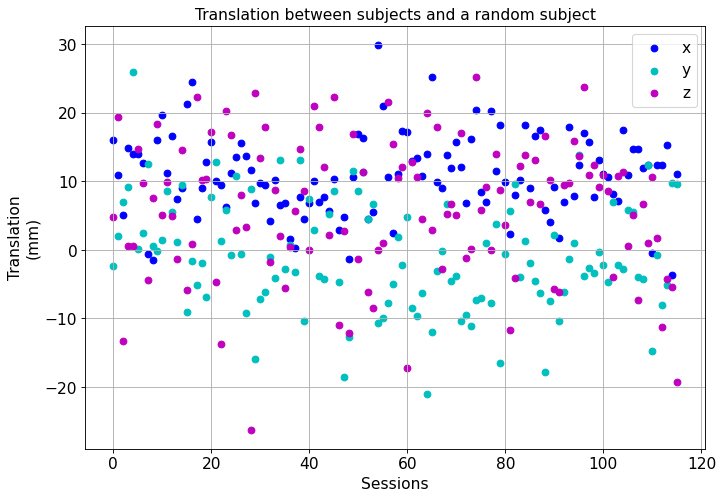

In [82]:
# Plot rotations in for one scan in within sessions groups 
plt.figure(figsize=(10, 7), dpi=80)
plt.scatter(range(0, len(translations_x)), translations_x, color='b', label='x')#({:.3f})'.format(np.nanmean(translations_x)))
plt.scatter(range(0, len(translations_y)), translations_y, color='c', label='y')# ({:.3f})'.format(np.nanmean(translations_y)))
plt.scatter(range(0, len(translations_z)), translations_z, color='m', label='z')# ({:.3f})'.format(np.nanmean(translations_z)))
plt.title('Translation between subjects and a random subject', fontsize=14)
plt.ylabel('Translation\n(mm)', fontsize=14)
plt.xlabel('Sessions', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(fontsize=14, loc='upper right')

In [6]:
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/*/*/motion_stats/transformation_matrix'):
    p.append(path)
p.sort()

rotation_x = []
rotation_y = []
rotation_z = []

for i in range(len(p)):
    transformation_params = np.loadtxt(p[i])
    R = transformation_params[:3,:3]
    # convert R to degress
    x = math.atan2(R[2,1], R[2,2])
    y = math.atan2(-R[2,0], math.sqrt(R[2,1]**2 + R[2,2]**2))
    z = math.atan2(R[1,0], R[0,0])

    x = x * 180 / math.pi
    y = y * 180 / math.pi
    z = z * 180 / math.pi
    rotation_x.append(x)
    rotation_y.append(y)
    rotation_z.append(z)

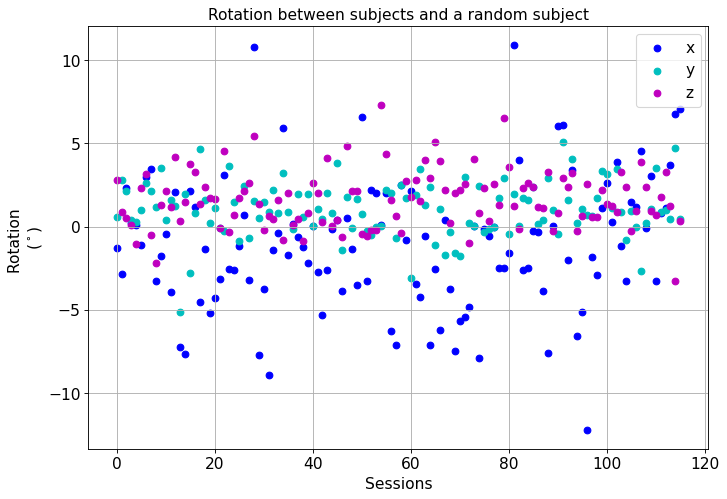

In [9]:
# Plot rotations in for one scan in within sessions groups 
plt.figure(figsize=(10, 7), dpi=80)
plt.scatter(range(0, len(rotation_x)), rotation_x, color='b', label='x')#({:.3f})'.format(np.nanmean(translations_x)))
plt.scatter(range(0, len(rotation_y)), rotation_y, color='c', label='y')# ({:.3f})'.format(np.nanmean(translations_y)))
plt.scatter(range(0, len(rotation_z)), rotation_z, color='m', label='z')# ({:.3f})'.format(np.nanmean(translations_z)))
plt.title('Rotation between subjects and a random subject', fontsize=14)
plt.ylabel('Rotation \n' r'($^\circ$)', fontsize=14)
plt.xlabel('Sessions', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(fontsize=14, loc='upper right')

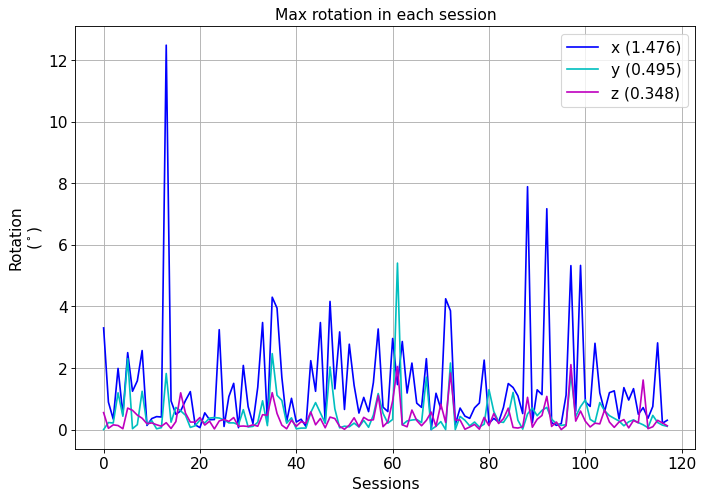

In [59]:
# Plot rotations in for one scan in within sessions groups 
plt.figure(figsize=(10, 7), dpi=80)
plt.plot(range(0, len(rotations_x)), rotations_x, color='b', label='x ({:.3f})'.format(np.nanmean(rotations_x)))
plt.plot(range(0, len(rotations_y)), rotations_y, color='c', label='y ({:.3f})'.format(np.nanmean(rotations_y)))
plt.plot(range(0, len(rotations_z)), rotations_z, color='m', label='z ({:.3f})'.format(np.nanmean(rotations_z)))
plt.title('Max rotation in each session', fontsize=14)
plt.ylabel('Rotation' '\n' r'($^\circ$)', fontsize=14)
plt.xlabel('Sessions', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(fontsize=14, loc='upper right')

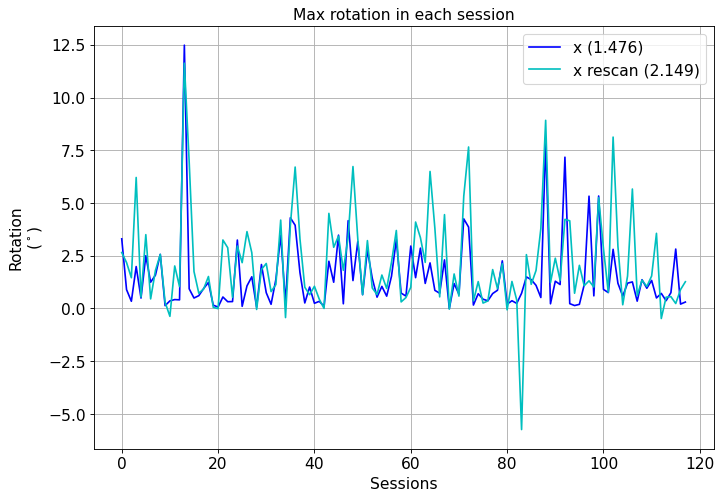

In [62]:
# Plot rotations in for one scan in within sessions groups 
plt.figure(figsize=(10, 7), dpi=80)
plt.plot(range(0, len(rotations_x)), rotations_x, color='b', label='x ({:.3f})'.format(np.nanmean(rotations_x)))
plt.plot(range(0, len(rotations_x2)), rotations_x2, color='c', label='x rescan ({:.3f})'.format(np.nanmean(rotations_x2)))
plt.title('Max rotation in each session', fontsize=14)
plt.ylabel('Rotation' '\n' r'($^\circ$)', fontsize=14)
plt.xlabel('Sessions', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(fontsize=14, loc='upper right')

In [ ]:
# Move PDF and rename
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/*/*/dwi/prequal_out/PDF/dtiQA.pdf'):
    p.append(path)
p.sort()
for i in range(len(p)):
    src_dir = p[i]
    root = '/nfs/masi/kanakap/projects/estimate/dtiqa_pdf/'
    subj = p[i].split('/')[7]
    sess = p[i].split('/')[8]
    scan = p[i].split('/')[9]
    filename = subj + '_' + sess + '_' + scan + '_' + 'dtiQA.pdf'
    # move p[i] to root/ filename
    des_dir = os.path.join(root,filename)
    print(src_dir)
    print(des_dir)
    shutil.copy(src_dir,des_dir)

In [92]:
import nibabel as nib
import random

In [159]:
# load JHU fa to get the voxel
jhu_registed_atlas = nib.load('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs032/ses-s1Bx1/JHUtoFArun1/FAatlas2subj.nii.gz').get_fdata()

# get a random point on the CC
positions = []
for i in range(jhu_registed_atlas.shape[0]):
    for j in range(jhu_registed_atlas.shape[1]):
        for k in range(jhu_registed_atlas.shape[2]):
            if jhu_registed_atlas[i][j][k] == 5:
                positions.append((i, j, k))
random_position = random.choice(positions)

In [156]:
random_position

array([50, 43, 27])

In [162]:
# rotate the point based on the tranformation matrix
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/*/*/motion_stats_dof6/transformation_matrix'):
    p.append(path)
p.sort()

# get the point in the another subj scan 
positions_other_brain = []
rot_matrix_all = []
for i in range(len(p)):
    t_matrix = np.loadtxt(p[i])
    rot_matrix = t_matrix[:3,:3]
    rot_matrix_all.append(rot_matrix)
    rot_position = np.dot(rot_matrix ,random_position)
    
    rot_position = rot_position.astype(int)
    positions_other_brain.append((rot_position[0],rot_position[1],rot_position[2]))


In [145]:
rot_matrix_all[2]


array([[ 0.99922311, -0.03548778,  0.01713905],
       [ 0.03625895,  0.99823647, -0.04700272],
       [-0.0154408 ,  0.04758765,  0.99874767]])

In [186]:
# get the DT in the random fixed brain
dt_f = nib.load('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs032/ses-s1Bx1/dwi_cat/dt_run-1.nii.gz').get_fdata()

# get the DT in other brains 
p = []
for path in glob.glob('/nfs/masi/kanakap/projects/estimate/MASiVar_kids/*/*/dwi_cat/dt_run-1.nii.gz'):
    p.append(path)
p.sort()

dt_rotated_all = []
dt_position_moving_all = []
# look at the rotation 
for i in range(len(p)):
    if p[i].split('/')[7] != p[i-1].split('/')[7]:
        f = dt_f[random_position]
        dt_position_fixed = [[f[0], f[3], f[4]], [f[3], f[1], f[5]], [f[4], f[5], f[2]]]

        dt_m = nib.load(p[i]).get_fdata()
        m = dt_m[positions_other_brain[i]]
        dt_position_moving = [[m[0], m[3], m[4]], [m[3], m[1], m[5]], [m[4], m[5], m[2]]]
        
        # change 
        dt_rotated = rot_matrix_all[i] * dt_position_moving * np.transpose(rot_matrix_all[i])
        # plot dt_rotated and dt_position_fixed should be the same 
        
        dt_position_moving_all.append(dt_position_moving)
        dt_rotated_all.append(dt_rotated)

/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs001/ses-s1Bx2/dwi_cat/dt_run-1.nii.gz
/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs002/ses-s1Bx2/dwi_cat/dt_run-1.nii.gz
/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs005/ses-s1Bx2/dwi_cat/dt_run-1.nii.gz
/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs006/ses-s1Bx2/dwi_cat/dt_run-1.nii.gz
/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs007/ses-s1Bx2/dwi_cat/dt_run-1.nii.gz
/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs009/ses-s1Bx2/dwi_cat/dt_run-1.nii.gz
/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs010/ses-s1Bx3/dwi_cat/dt_run-1.nii.gz
/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs012/ses-s1Bx2/dwi_cat/dt_run-1.nii.gz
/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs013/ses-s1Bx2/dwi_cat/dt_run-1.nii.gz
/nfs/masi/kanakap/projects/estimate/MASiVar_kids/sub-cIVs015/ses-s1Bx2/dwi_cat/dt_run-1.nii.gz
/nfs/masi/kanakap/projects/estimate/MASiVar_kids/s

In [187]:
intersubject = {"dt_position_moving_all" : dt_position_moving_all, "dt_rotated_all": dt_rotated_all, "dt_position_fixed": dt_position_fixed}
savemat("/nfs/masi/kanakap/projects/estimate/matlab_matrix.mat", intersubject)

In [ ]:
# load fas

# get the CC voxels

# load all the transformation matrix - get the rotate voxels

# load all the dts scan and rescan 

# compare CC voxel dt and rotate dt 